<a href="https://colab.research.google.com/github/randiijulian/Final-Project-Kelompok-02-Rauzan-Sumara/blob/main/%5BRevisi%5D_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mobile Price Classification

Nama:
1.   Randi Julian Saputra


install kaggle untuk import dataset pada kaggle

In [475]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle
from google.colab import files
files.upload()
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d iabhishekofficial/mobile-price-classification
!ls

Saving kaggle.json to kaggle (5).json
mobile-price-classification.zip: Skipping, found more recently modified local copy (use --force to force download)
'kaggle (1).json'  'kaggle (5).json'		      test.csv
'kaggle (2).json'   kaggle.json			      train.csv
'kaggle (3).json'   mobile-price-classification.zip
'kaggle (4).json'   sample_data


In [476]:
import zipfile
local_zip = '/content/mobile-price-classification.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

##Import Library

In [477]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Code you have previously used to load data
import pandas as pd

##EDA (Exploratory Data Analysis)

In [478]:
iowa_file_path = '/content/train.csv'
home_data = pd.read_csv(iowa_file_path)
home_data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [479]:
home_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [480]:
home_data.shape

(2000, 21)

In [481]:
home_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Penjelasan :

* battery_power : Total energy a battery can store in one time measured in mAh
* blue : Has bluetooth or not
* clock_speed : speed at which microprocessor executes instructions
* dual_sim : Has dual sim support or not
* fc : Front Camera mega pixels
* four_g : Has 4G or not
* int_memory : Internal Memory in Gigabytes
* m_dep : Mobile Depth in cm
* mobile_wt : Weight of mobile phone
* n_cores : Number of cores of processor
* pc : Primary Camera mega pixels
* px_height : Pixel Resolution Height
* px_width : Pixel Resolution Width
* ram : Random Access Memory in Mega Bytes
* sc_h : Screen Height of mobile in cm
* sc_w : Screen Width of mobile in cm
* talk_time : longest time that a single battery charge will last when you are
* three_g : Has 3G or not
* touch_screen : Has touch screen or not
* wifi : Has wifi or not
* price_range : This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

In [482]:
home_data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [483]:
home_data.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [484]:
home_data.nunique().sum()

5240

In [485]:
home_data.nunique().mean()

249.52380952380952

In [486]:
categorical_features=list()
numeric_features=list()
for column_name in home_data.columns:
    unique_values = len(home_data[column_name].unique())
    if unique_values<250:
      categorical_features.append(column_name)
    else:
      numeric_features.append(column_name)

In [487]:
categorical_features

['blue',
 'clock_speed',
 'dual_sim',
 'fc',
 'four_g',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi',
 'price_range']

In [488]:
numeric_features

['battery_power', 'px_height', 'px_width', 'ram']

Melakukan check data null pada dataset

In [489]:
home_data.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

###Data Cleansing

Mengecek outlier pada setiap kolom dengan menggunakan rumus interquartile

In [490]:
q1 = home_data["battery_power"].quantile(0.25)
q3 = home_data["battery_power"].quantile(0.75)

iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr #batas bawah
fence_high = q3+1.5*iqr #batas atas

home_data.loc[(home_data["battery_power"] < fence_low) | (home_data["battery_power"] > fence_high)]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [491]:
#Mengecek outlier kolom clock_speed
q1 = home_data["clock_speed"].quantile(0.25)
q3 = home_data["clock_speed"].quantile(0.75)

iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr

home_data.loc[(home_data["clock_speed"] < fence_low) | (home_data["clock_speed"] > fence_high)]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [492]:
#Mengecek outlier kolom int_memory
q1 = home_data["int_memory"].quantile(0.25)
q3 = home_data["int_memory"].quantile(0.75)

iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr

home_data.loc[(home_data["int_memory"] < fence_low) | (home_data["int_memory"] > fence_high)] 

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [493]:
#Mengecek outlier kolom m_dep
q1 = home_data["m_dep"].quantile(0.25)
q3 = home_data["m_dep"].quantile(0.75)

iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr

home_data.loc[(home_data["m_dep"] < fence_low) | (home_data["m_dep"] > fence_high)] 

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [494]:
#Mengecek outlier kolom mobile_wt
q1 = home_data["mobile_wt"].quantile(0.25)
q3 = home_data["mobile_wt"].quantile(0.75)

iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr

home_data.loc[(home_data["mobile_wt"] < fence_low) | (home_data["mobile_wt"] > fence_high)] 

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [495]:
#Mengecek outlier kolom n_cores
q1 = home_data["n_cores"].quantile(0.25)
q3 = home_data["n_cores"].quantile(0.75)

iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr

home_data.loc[(home_data["n_cores"] < fence_low) | (home_data["n_cores"] > fence_high)] 

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [496]:
#Mengecek outlier kolom pc
q1 = home_data["pc"].quantile(0.25)
q3 = home_data["pc"].quantile(0.75)

iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr

home_data.loc[(home_data["pc"] < fence_low) | (home_data["pc"] > fence_high)] 

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [497]:
#Mengecek outlier kolom px_width
q1 = home_data["px_width"].quantile(0.25)
q3 = home_data["px_width"].quantile(0.75)

iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr

home_data.loc[(home_data["px_width"] < fence_low) | (home_data["px_width"] > fence_high)] 

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [498]:
#Mengecek outlier kolom ram
q1 = home_data["ram"].quantile(0.25)
q3 = home_data["ram"].quantile(0.75)

iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr

home_data.loc[(home_data["ram"] < fence_low) | (home_data["ram"] > fence_high)] 

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [499]:
#Mengecek outlier kolom sc_h
q1 = home_data["sc_h"].quantile(0.25)
q3 = home_data["sc_h"].quantile(0.75)

iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr

home_data.loc[(home_data["sc_h"] < fence_low) | (home_data["sc_h"] > fence_high)] 

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [500]:
#Mengecek outlier kolom sc_w
q1 = home_data["sc_w"].quantile(0.25)
q3 = home_data["sc_w"].quantile(0.75)

iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr

home_data.loc[(home_data["sc_w"] < fence_low) | (home_data["sc_w"] > fence_high)] 

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [501]:
#Mengecek outlier kolom talk_time
q1 = home_data["talk_time"].quantile(0.25)
q3 = home_data["talk_time"].quantile(0.75)

iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr

home_data.loc[(home_data["talk_time"] < fence_low) | (home_data["talk_time"] > fence_high)] 

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [502]:
#Mengecek apakah ada data yang duplikat
home_data.duplicated().sum()

0

###Visualize

Text(0.5, 1.0, 'Correlation ')

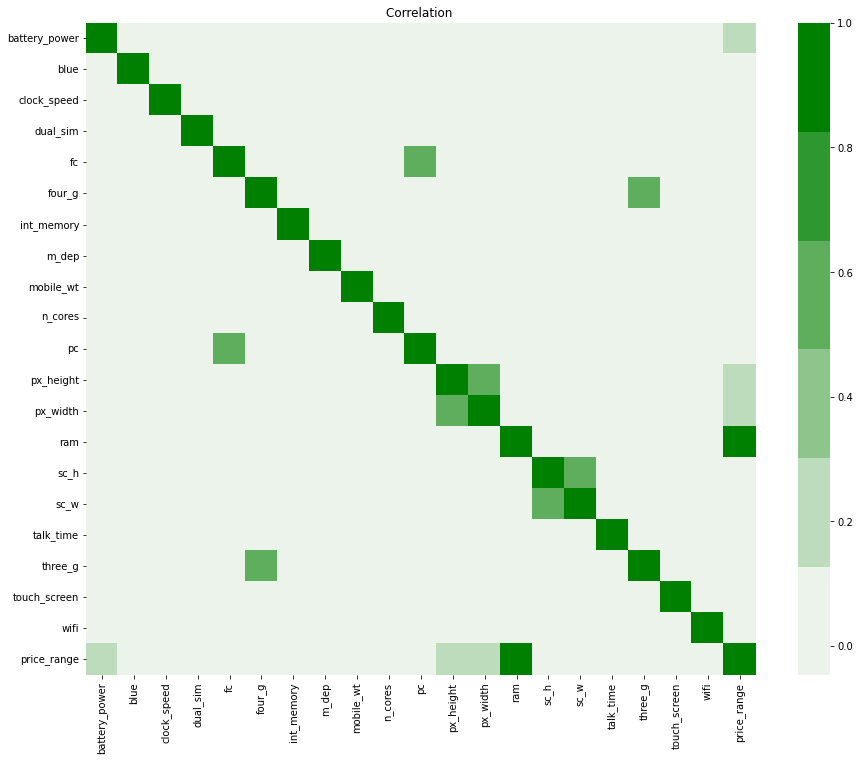

In [503]:
corr=home_data.corr()
fig = plt.figure(figsize=(15,12))
color = sns.light_palette("green")
r = sns.heatmap(corr, cmap = color)
r.set_title("Correlation ")

price_range memiliki korelasi terhadap ram, px_width, px_height,dan battery power

####Analysis to check Outlier in Numeric Features

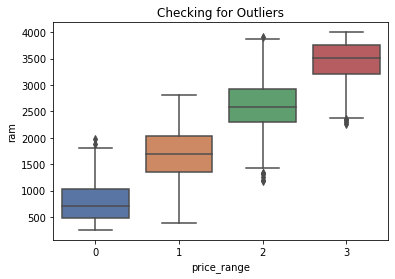

In [504]:
plt.title("Checking for Outliers")
sns.boxplot(x='price_range' , y='ram', data = home_data, palette="deep")

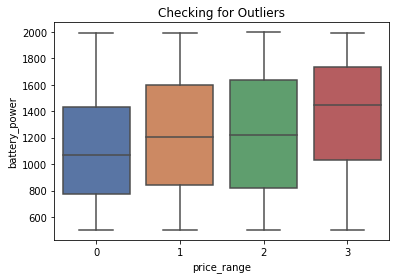

In [505]:
plt.title("Checking for Outliers")
sns.boxplot(x='price_range' , y='battery_power', data = home_data, palette="deep")

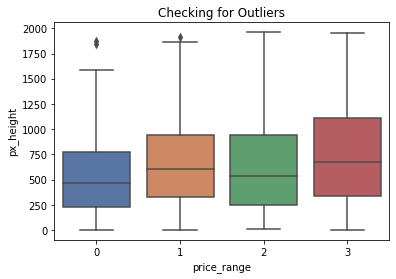

In [506]:
plt.title("Checking for Outliers")
sns.boxplot(x='price_range' , y='px_height', data = home_data, palette="deep")

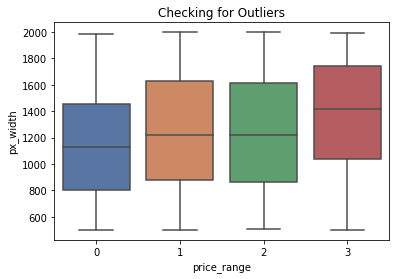

In [507]:
plt.title("Checking for Outliers")
sns.boxplot(x='price_range' , y='px_width', data = home_data, palette="deep")

####Membuat plot histogram in Numeric Features

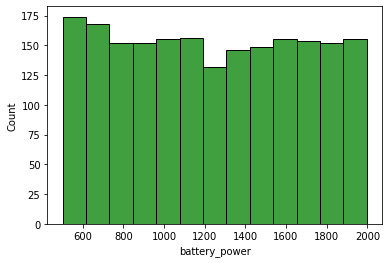

In [508]:
ax = sns.histplot(data = home_data, x='battery_power', color='green') #membuat plot histogram battery_power sepanjang sumbu x
plt.show() #menampilkan visualisasi

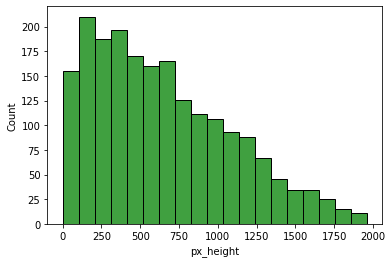

In [509]:
ax = sns.histplot(data = home_data, x='px_height', color='green') #membuat plot histogram px_height sepanjang sumbu x
plt.show() #menampilkan visualisasi

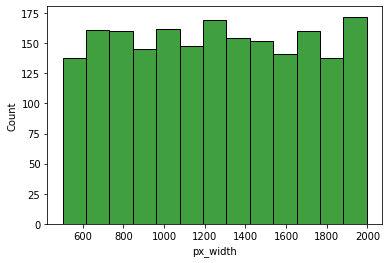

In [510]:
ax = sns.histplot(data = home_data, x='px_width', color='green') #membuat plot histogram px_width sepanjang sumbu x
plt.show() #menampilkan visualisasi

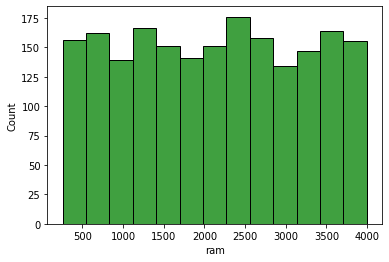

In [511]:
ax = sns.histplot(data = home_data, x='ram', color='green') #membuat plot histogram ram sepanjang sumbu x
plt.show() #menampilkan visualisasi

##Modeling

splitting dataset

In [512]:
y = home_data["price_range"].values #mendefinisikan y dengan kolom price-range
x = home_data.drop(["price_range"],axis=1) #mendefinisikan x dengan memilih semua kolom kecuali kolom price_range

In [513]:
# splitting data menjadi train & test with test size 20%
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=1)

*   x_train : Untuk menampung data source yang akan dilatih.
*   y_train : Untuk menampung data target yang akan dilatih.
*   x_test : Untuk menampung data source yang akan digunakan untuk testing.
*   y_test : Untuk menampung data target yang akan digunakan untuk testing.
*   x dan y adalah nama variabel yang digunakan saat mendefinisikan data source dan data target.
*   Parameter test_size digunakan untuk mendefinisikan ukuran data testing.
*   Dalam contoh di atas, test_size=0.2 berarti data yang digunakan sebagai data testing adalah sebesar 20% dari keseluruhan dataset.








In [514]:
x_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
816,805,1,0.7,0,0,0,64,0.1,97,4,14,641,704,418,11,6,17,0,1,1
790,911,1,2.9,0,0,0,46,0.1,181,5,1,461,670,363,9,5,17,0,1,0
361,899,0,0.5,1,13,1,57,0.9,172,2,18,788,1331,364,11,1,7,1,1,0
592,1263,0,0.5,0,12,0,64,0.3,175,5,18,178,1883,1183,14,3,17,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1791,1203,1,0.5,1,0,1,11,0.9,109,2,12,35,510,1672,17,13,19,1,1,0
1096,1154,0,2.0,0,6,1,35,0.8,159,5,16,1003,1827,3262,16,15,16,1,0,0
1932,718,1,1.6,1,1,1,30,0.4,93,3,12,662,997,1601,10,9,12,1,1,1
235,1523,1,1.8,0,6,1,11,0.1,129,1,8,148,1606,707,19,8,19,1,1,0


In [515]:
x_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
674,1034,0,2.6,1,2,1,45,0.3,190,3,4,182,1293,969,15,1,7,1,0,0
1699,1002,1,1.8,0,1,0,45,0.7,180,7,7,948,1007,1234,19,13,18,1,1,0
1282,609,1,0.5,0,4,1,10,0.1,81,6,6,113,1524,1905,16,3,18,1,1,1
1315,1510,0,0.6,1,1,0,32,0.7,135,3,8,963,1520,854,8,2,10,1,0,1
1210,805,1,1.7,1,0,1,58,0.9,168,3,10,81,1544,3397,7,6,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1266,0,1.9,1,0,1,7,0.2,184,3,12,346,1468,2532,10,5,4,1,1,1
763,1741,1,1.8,0,0,0,14,0.7,143,8,0,730,1895,3387,11,3,3,1,0,0
385,1880,1,1.8,0,4,1,18,0.7,138,3,5,71,699,3333,17,15,7,1,0,0
1667,1967,0,0.5,0,0,1,46,0.6,199,1,7,518,1374,1567,15,2,7,1,1,0


###Naive Bayes

Modeling menggunakan Naive Bayes

In [516]:
from sklearn.naive_bayes import GaussianNB #import library
GNB = GaussianNB() #deklarasi GNB dengan memanggil fungsi GaussianNB
GNB.fit(x_train, y_train)

GaussianNB()

In [517]:
print("test accuracy naive bayes:",GNB.score(x_test,y_test))

test accuracy naive bayes: 0.7575


###Random Forest

Modeling menggunakan Random Forest

In [518]:
from sklearn.ensemble import RandomForestClassifier #import library
rfc = RandomForestClassifier(n_estimators=249) #deklarasi rfc dengan memanggil fungsi RandomForestClassifier dengan parameter default(249)
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=249)

In [519]:
print("test accuracy random forest:",rfc.score(x_test,y_test))

test accuracy random forest: 0.8725


###Decision Tree

Modeling menggunakan Decision Tree

In [538]:
from sklearn.tree import DecisionTreeClassifier #import library
dtree = tree.DecisionTreeClassifier() #deklarasi dtree dengan memanggil fungsi DecisionTreeClassifier
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [539]:
print("test accuracy decision tree:",dtree.score(x_test,y_test))

test accuracy decision tree: 0.8375


##Evaluation

Melakukan evaluasi pada model yang telah dibuat

In [522]:
y_gnb = GNB.predict(x_test) #mendefinisikan objek y_gnb sebagai hasil prediksi dari model svm yang dibuat ke test set
y_rfc = rfc.predict(x_test) #mendefinisikan objek y_rfc sebagai hasil prediksi dari model decision treee yang dibuat ke test set
y_dtree = dtree.predict(x_test) #mendefinisikan objek y_dtree sebagai hasil prediksi dari model decision treee yang dibuat ke test set

In [523]:
#mengimport accuracy_score dari sklearn.metrics
from sklearn.metrics import accuracy_score 
acc_gnb = accuracy_score(y_test, y_gnb)
acc_rfc = accuracy_score(y_test, y_rfc)
acc_dtree = accuracy_score(y_test, y_dtree)
print('Accuracy with Naive Bayes : ', acc_gnb)
print('Accuracy with Random Forest :', acc_rfc)
print('Accuracy with Decision Tree :', acc_dtree)

Accuracy with Naive Bayes :  0.7575
Accuracy with Random Forest : 0.8725
Accuracy with Decision Tree : 0.835


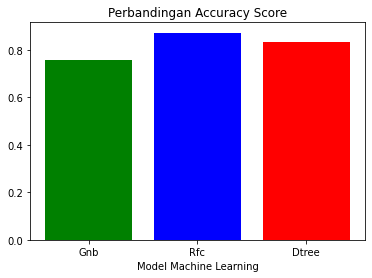

In [524]:
#menampilkan grafik dari accuracy_score
x = [0, 1, 2]
y = [acc_gnb, acc_rfc, acc_dtree]

fig,ax = plt.subplots()

ax.bar(x, y, align='center', color=['green', 'blue', 'red'])

ax.set_title('Perbandingan Accuracy Score')
ax.set_xlabel('Model Machine Learning')

ax.set_xticks(x)
ax.set_xticklabels(('Gnb', 'Rfc', 'Dtree'))

plt.show()

In [525]:
#mengimport precision_score dari sklearn.metrics
from sklearn.metrics import precision_score 
pre_gnb = precision_score(y_test, y_gnb, average='macro')
pre_rfc = precision_score(y_test, y_rfc, average='macro')
pre_dtree = precision_score(y_test, y_dtree, average='macro')
print('Precision with Naive Bayes : ', pre_gnb)
print('Precision with Random Forest :', pre_rfc)
print('Precision with Decision Tree :', pre_dtree)

Precision with Naive Bayes :  0.7636188618861885
Precision with Random Forest : 0.8743063295254018
Precision with Decision Tree : 0.8393842218981201


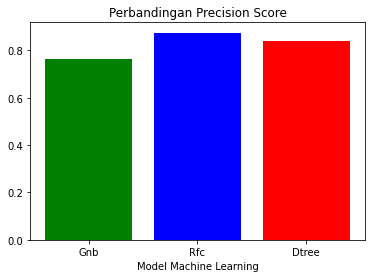

In [526]:
#menampilkan grafik dari precision_score
x = [0, 1, 2]
y = [pre_gnb, pre_rfc, pre_dtree]

fig,ax = plt.subplots()

ax.bar(x, y, align='center', color=['green', 'blue', 'red'])

ax.set_title('Perbandingan Precision Score')
ax.set_xlabel('Model Machine Learning')

ax.set_xticks(x)
ax.set_xticklabels(('Gnb', 'Rfc', 'Dtree'))

plt.show()

In [527]:
#mengimport recall_score dari sklearn.metrics
from sklearn.metrics import recall_score 
recal_gnb = recall_score(y_test, y_gnb, average='macro')
recal_rfc = recall_score(y_test, y_rfc, average='macro')
recal_dtree = recall_score(y_test, y_dtree, average='macro')
print('Recall with Naive Bayes : ', recal_gnb)
print('Recall with Random Forest :', recal_rfc)
print('Recall with Decision Tree :', recal_dtree)

Recall with Naive Bayes :  0.7591904224774405
Recall with Random Forest : 0.8731414068908943
Recall with Decision Tree : 0.8370654737489747


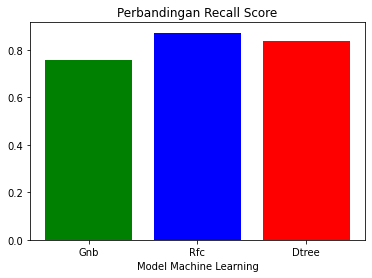

In [528]:
#menampilkan grafik dari recall_score
x = [0, 1, 2]
y = [recal_gnb, recal_rfc, recal_dtree]

fig,ax = plt.subplots()

ax.bar(x, y, align='center', color=['green', 'blue', 'red'])

ax.set_title('Perbandingan Recall Score')
ax.set_xlabel('Model Machine Learning')

ax.set_xticks(x)
ax.set_xticklabels(('Gnb', 'Rfc', 'Dtree'))

plt.show()